In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.svm import SVR

In [ ]:
data = pd.read_csv('Bitcoin_Dataset.csv')

In [3]:
data.head()

,timestamp,open,close,high,low
0,2020-03-25 08:00:00,6500.0,6511.5,6628.5,6457.5
1,2020-03-25 12:00:00,6511.5,6615.0,6745.5,6502.0
2,2020-03-25 16:00:00,6615.0,6622.0,6695.5,6592.5
3,2020-03-25 20:00:00,6622.0,6698.5,6698.5,6556.0
4,2020-03-26 00:00:00,6698.5,6726.5,6767.0,6655.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11736 entries, 0 to 11735
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  11736 non-null  object 
 1   open       11736 non-null  float64
 2   close      11736 non-null  float64
 3   high       11736 non-null  float64
 4   low        11736 non-null  float64
dtypes: float64(4), object(1)
memory usage: 458.6+ KB


In [5]:
display(data.describe())

,open,close,high,low
count,11736.000000,11736.000000,11736.000000,11736.000000
mean,44294.572648,44303.892007,44671.619436,43903.818473
std,27539.124717,27544.794829,27712.789189,27363.779404
min,5873.000000,5873.000000,5950.000000,5841.500000
25%,22891.000000,22893.000000,23085.100000,22676.875000
50%,38600.100000,38605.250000,39094.000000,38139.750000
75%,60990.425000,60994.375000,61471.250000,60518.925000
max,122780.000000,122838.000000,122838.000000,121480.000000


In [6]:
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 0


In [7]:
data.tail()

,timestamp,open,close,high,low
11731,2025-08-01 12:00:00,114917.0,115193.0,115240.0,114326.0
11732,2025-08-01 16:00:00,115259.0,115326.0,115899.0,114322.0
11733,2025-08-01 20:00:00,115341.0,113395.0,115593.0,113379.0
11734,2025-08-02 00:00:00,113288.0,113235.0,113965.0,112825.0
11735,2025-08-02 04:00:00,113275.0,113803.0,113832.0,113239.0


In [8]:
predictionDays = 50
data['Prediction'] = data['close'].shift(-predictionDays)

In [9]:
data.dropna(inplace=True)

data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M:%S')
data = data.set_index('timestamp')

In [10]:
X = data[['close']].values
y = data['Prediction'].values

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
predictionDays_array = data[['close']].values[-predictionDays:]
print("Shapes of training and testing data:")
print("xtrain shape:", xtrain.shape)
print("ytrain shape:", ytrain.shape)
print("xtest shape:", xtest.shape)
print("ytest shape:", ytest.shape)
print("\nShape of predictionDays_array:", predictionDays_array.shape)

Shapes of training and testing data:
xtrain shape: (9348, 1)
ytrain shape: (9348,)
xtest shape: (2338, 1)
ytest shape: (2338,)

Shape of predictionDays_array: (50, 1)


In [11]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(xtrain, ytrain)
linear_regression_confidence = linear_regression_model.score(xtest, ytest)
print('Linear Regression accuracy :', linear_regression_confidence)

Linear Regression accuracy : 0.9781109455543543


In [12]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(xtrain, ytrain)
random_forest_confidence = random_forest_model.score(xtest, ytest)
print('Random Forest Regressor accuracy :', random_forest_confidence)

Random Forest Regressor accuracy : 0.971490559739541


In [13]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(xtrain, ytrain)
svr_rbf_confidence = svr_rbf.score(xtest, ytest)
print('SVR_RBF accuracy :', svr_rbf_confidence)

SVR_RBF accuracy : 0.8250600672942165


In [14]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(xtrain, ytrain)
xgb_confidence = xgb_model.score(xtest, ytest)
print('XGBoost Regressor accuracy :', xgb_confidence)

XGBoost Regressor accuracy : 0.9797571970727822


In [15]:
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(xtrain, ytrain)
lgb_confidence = lgb_model.score(xtest, ytest)
print('LightGBM Regressor accuracy :', lgb_confidence)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9348, number of used features: 1
[LightGBM] [Info] Start training from score 44293.508340
LightGBM Regressor accuracy : 0.9795553266504416


d:\Education\Coding\.conda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [16]:
catboost_model = cb.CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)
catboost_model.fit(xtrain, ytrain)
catboost_confidence = catboost_model.score(xtest, ytest)
print('CatBoost Regressor accuracy :', catboost_confidence)

CatBoost Regressor accuracy : 0.9799295710740428


In [17]:
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)
adaboost_model.fit(xtrain, ytrain)
adaboost_confidence = adaboost_model.score(xtest, ytest)
print('AdaBoost Regressor accuracy :', adaboost_confidence)

AdaBoost Regressor accuracy : 0.969019652465407


In [18]:
model_accuracies = {
    'SVR_RBF': svr_rbf_confidence,
    'Linear Regression': linear_regression_confidence,
    'Random Forest Regressor': random_forest_confidence,
    'XGBoost Regressor': xgb_confidence,
    'LightGBM Regressor': lgb_confidence,
    'CatBoost Regressor': catboost_confidence,
    'AdaBoost Regressor': adaboost_confidence
}

for model_name, accuracy in model_accuracies.items():
    print(f'{model_name} accuracy : {accuracy}')

best_model_name = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest performing model: {best_model_name}")

SVR_RBF accuracy : 0.8250600672942165
Linear Regression accuracy : 0.9781109455543543
Random Forest Regressor accuracy : 0.971490559739541
XGBoost Regressor accuracy : 0.9797571970727822
LightGBM Regressor accuracy : 0.9795553266504416
CatBoost Regressor accuracy : 0.9799295710740428
AdaBoost Regressor accuracy : 0.969019652465407

Best performing model: CatBoost Regressor


In [19]:
bitcoin_predictions = catboost_model.predict(predictionDays_array)
print(bitcoin_predictions)

[117624.40239641 117624.40239641 117624.40239641 116437.74492065
 117624.40239641 117624.40239641 117624.40239641 117624.40239641
 117624.40239641 117624.40239641 117624.40239641 117624.40239641
 116437.74492065 116437.74492065 116437.74492065 117624.40239641
 117624.40239641 117624.40239641 117624.40239641 117624.40239641
 116437.74492065 116437.74492065 117624.40239641 116437.74492065
 117624.40239641 117624.40239641 116437.74492065 117624.40239641
 117624.40239641 117624.40239641 117624.40239641 116437.74492065
 116437.74492065 116437.74492065 117624.40239641 117624.40239641
 117624.40239641 117624.40239641 117624.40239641 117624.40239641
 117624.40239641 117624.40239641 117624.40239641 117624.40239641
 117624.40239641 117624.40239641 117624.40239641 117624.40239641
 117624.40239641 117624.40239641]


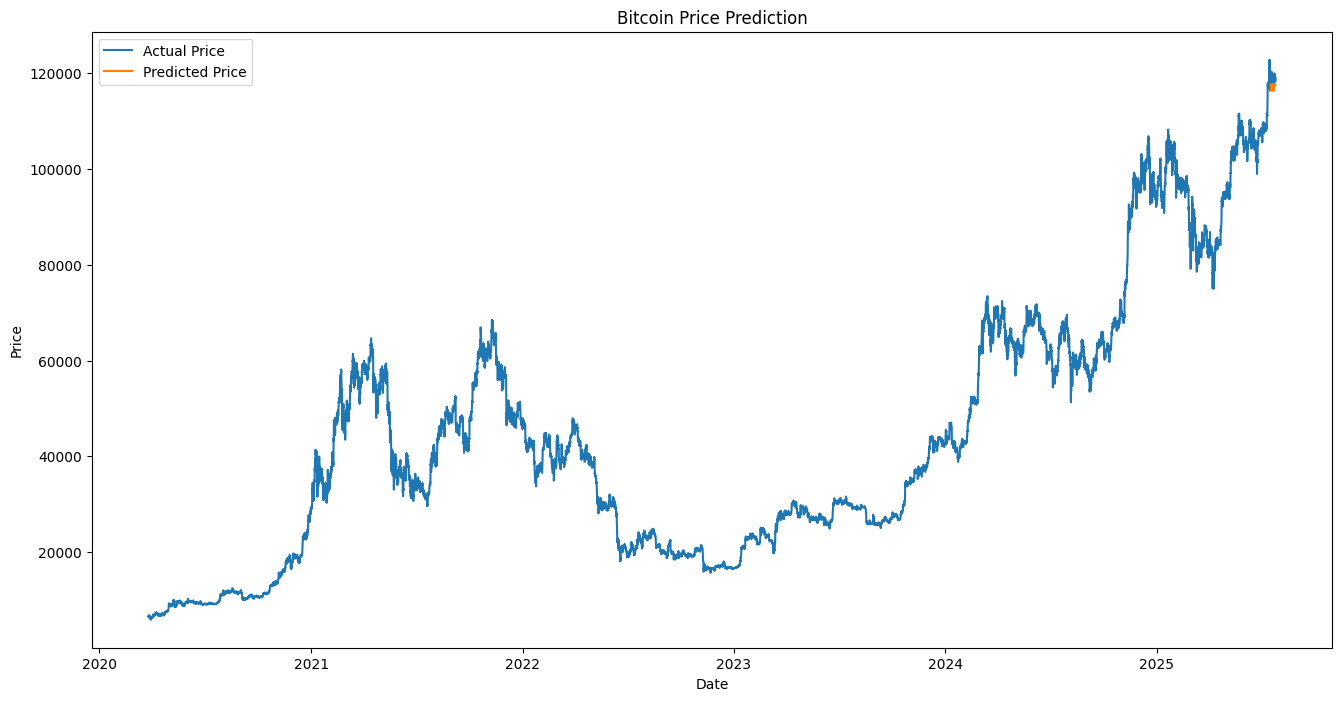

In [20]:
import matplotlib.pyplot as plt
actual_prices = data['close'].tail(predictionDays).values
prediction_dates = data.index[-predictionDays:]
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['close'], label='Actual Price')
plt.plot(prediction_dates, bitcoin_predictions, label='Predicted Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
import joblib

joblib.dump(catboost_model, 'model.pkl')

['model.pkl']